<a href="https://colab.research.google.com/github/zyf2021/paois/blob/main/LAB_PAOIS_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import librosa.display
import IPython.display as ipd

from scipy.io.wavfile import read
from scipy.io.wavfile import write
from scipy.fft import rfft, rfftfreq
from scipy.fft import irfft

import scipy.signal

from mutagen.mp3 import MP3

import numpy as np

import matplotlib.pyplot as plt
#

%matplotlib inline

In [ ]:
#Частота
samplerate = 44100
#Длительность в секундах
duration = 10
#вектор времени
t = np.linspace(0, duration, samplerate*duration, False)

F_signal = [400, 500, 300]
A_signal = [20, 1.5, 5]

F_noise = [6300, 500, 4000]
A_noise = [0.5, 1.5, 5]

t.shape

(441000,)

In [ ]:
#Генерация исходного аудио
data = A_signal[0]*np.sin(2*np.pi*F_signal[0]*t)+A_signal[1]*np.sin(2*np.pi*F_signal[1]*t)

In [ ]:
#Генерация шума
noise = A_noise[0]*np.sin(2*np.pi*F_noise[0]*t) + A_noise[1]*np.sin(2*np.pi*F_noise[1]*t) + A_noise[2]*np.sin(2*np.pi*F_noise[2]*t)

In [ ]:
#Получение сигнала с шумом
data_n = data+noise

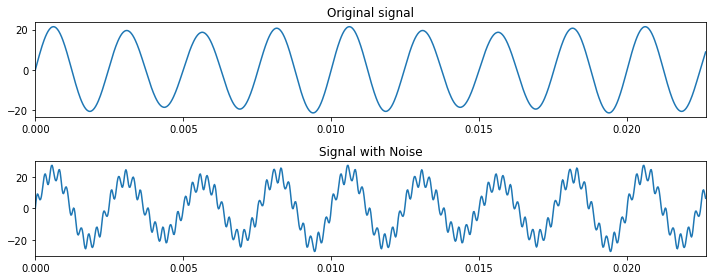

In [ ]:
#Графики исходный, с шумом, фильтрованный
plt.figure(figsize=(10, 4))

plt.subplot(211)
plt.plot(t[:1000], data[:1000])
plt.title("Original signal")
plt.margins(0, .05)

plt.subplot(212)
plt.plot(t[:1000], data_n[:1000])
plt.title("Signal with Noise")
plt.margins(0, .05)

plt.tight_layout()
plt.show()

In [ ]:
audio_3_with_noise = np.int16((data_n / data_n.max()) * 32767)
write("audio_3_noise.wav", samplerate, audio_3_with_noise)
audio_3_noise_path = './audio_3_noise.wav'
ipd.Audio(audio_3_noise_path)

In [ ]:
audio_3_without_noise = np.int16((data / data.max()) * 32767)
write("audio_3.wav", samplerate, audio_3_without_noise)
audio_3_path = './audio_3.wav'
ipd.Audio(audio_3_path)

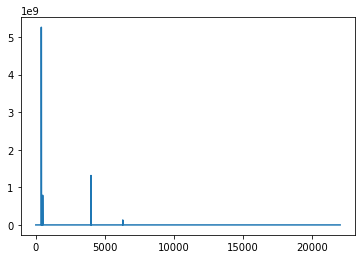

In [ ]:
yf = rfft(audio_3_with_noise)
xf = rfftfreq(samplerate*duration, 1/samplerate)

plt.plot(xf, np.abs(yf))
plt.show()

In [ ]:
xf

array([0.00000e+00, 1.00000e-01, 2.00000e-01, ..., 2.20498e+04,
       2.20499e+04, 2.20500e+04])

In [ ]:
# Максимальная частота составляет половину частоты дискретизации
points_per_freq = len(xf) / (samplerate / 2)
print(points_per_freq)
# Наша целевая частота - 4000 Гц
target_idx = int(points_per_freq * 6300)
print(target_idx)

10.000045351473922
63000


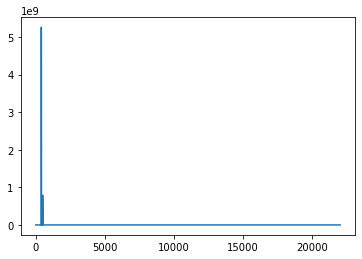

In [ ]:
yf[target_idx-1:target_idx+1] = 0

plt.plot(xf, np.abs(yf))
plt.show()

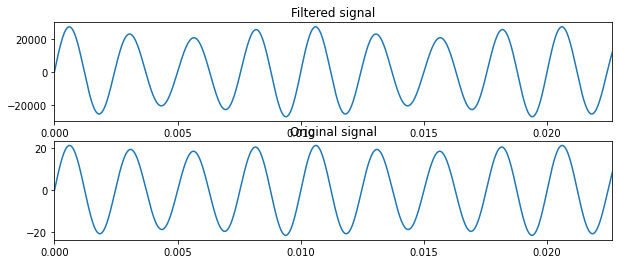

In [ ]:
data_filter = irfft(yf)

plt.figure(figsize=(10, 4))

plt.subplot(211)
plt.plot(t[:1000], data_filter[:1000])
plt.title("Filtered signal")
plt.margins(0, .05)

plt.subplot(212)
plt.plot(t[:1000], data[:1000])
plt.title("Original signal")
plt.margins(0, .05)

plt.show()

In [ ]:
audio_3_filter_noise = np.int16((data_filter / data_filter.max()) * 32767)
write("audio_3_filter.wav", samplerate, audio_3_filter_noise)
audio_3_filter_path = './audio_3_filter.wav'
ipd.Audio(audio_3_filter_path)

In [ ]:
b, a = scipy.signal.butter(5, 0.17)
filtered = scipy.signal.filtfilt(b, a, data_n)

In [ ]:
sos = scipy.signal.butter(40, 50, 'lp', fs=1000, output='sos')
filtered = scipy.signal.sosfiltfilt(sos, data_n)

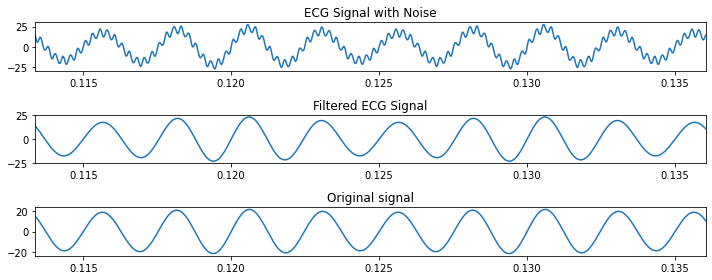

In [ ]:
# plot the original data next to the filtered data

plt.figure(figsize=(10, 4))

plt.subplot(311)
plt.plot(t[5000:6000], data_n[5000:6000])
plt.title("Signal with Noise")
plt.margins(0, .05)

plt.subplot(312)
plt.plot(t[5000:6000], filtered[5000:6000])
plt.title("Filtered Signal")
plt.margins(0, .05)


plt.subplot(313)
plt.plot(t[5000:6000], data[5000:6000])
plt.title("Original signal")
plt.margins(0, .05)

plt.tight_layout()
plt.show()

In [ ]:
normalized_tone_filtered = np.int16((filtered / filtered.max()) * 32767)
write("audio_2_filtered.wav", samplerate, normalized_tone_filtered)
audio_path = './audio_2_filtered.wav'
ipd.Audio(audio_path)